### Import Required Libraries 

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
plt.style.use('ggplot')

### Import Required the Data Set

In [37]:
# Import the dataset
data = pd.read_csv('liver_disease_1.csv')

# Check the dimensionality
data.shape

(583, 10)

So we get the number number of rows(observations) as 583 and the number of columns(variables) as 10.

We have 9 independent variables and one target variable.

In [38]:
# Check a sample of the data 
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


### Preprocessing Data

In [39]:
# Find if any values are missing or null or in an incorrect data type.
# We use info() for this. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


We find that there are 10 variables and 583 observations.
In the Albumin_and_Globulin_Ratio there are only 579 non-null columns but the total records are 583. So 4 records have missing value for Albumin_and_Globulin_Ratio.

In [40]:
data_duplicate = data[data.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
data_duplicate

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,0.9,0.3,293,232,245,6.8,3.1,0.80,Yes
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,Yes
25,34,4.1,2.0,289,875,731,5.0,2.7,1.10,Yes
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,Yes
33,38,2.6,1.2,410,59,57,5.6,3.0,0.80,No
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,No
54,42,8.9,4.5,272,31,61,5.8,2.0,0.50,Yes
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,Yes
61,58,1.0,0.5,158,37,43,7.2,3.6,1.00,Yes
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,Yes


In [41]:
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the duplicate values
data = data[~data.duplicated(subset = None, keep = 'first')]
data.shape

(570, 10)

In [42]:
# Remove records with empty values for features.
data = data.dropna()

In [43]:
# Check if any features have 0 values

In [44]:
data.loc[(data['Age'] == 0)]


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [45]:
data.loc[(data['Total_Bilirubin'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [46]:
data.loc[(data['Direct_Bilirubin'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [47]:
data.loc[(data['Alkaline_Phosphotase'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [48]:
data.loc[(data['Alamine_Aminotransferase'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [49]:
data.loc[(data['Aspartate_Aminotransferase'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [50]:
data.loc[(data['Total_Protiens'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [51]:
data.loc[(data['Albumin'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [52]:
data.loc[(data['Albumin_and_Globulin_Ratio'] == 0)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [53]:
# Lets distribute the variable labels into two lists of Features and Target respectively
Features = data.columns[:-1] 
Target = data.columns[-1] 

In [54]:
# Find if any values are missing or null or in an incorrect data type.
# We use info() for this. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Total_Bilirubin             566 non-null    float64
 2   Direct_Bilirubin            566 non-null    float64
 3   Alkaline_Phosphotase        566 non-null    int64  
 4   Alamine_Aminotransferase    566 non-null    int64  
 5   Aspartate_Aminotransferase  566 non-null    int64  
 6   Total_Protiens              566 non-null    float64
 7   Albumin                     566 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     566 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 48.6+ KB


In [55]:
# Now that we know that our dataset doesn't have missing values,null values or values with wrong data-types, 
# lets look at the statistical summary of the numerical data
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


Here the count, mean, std, min and max show the number of values, average value, the standard deviation, minimum value and maximum value of each column respectively 25%, 50%,75% show the 25th percentile(1st quartile), 50th percentile(median/2nd quaritle) and the 75th percentile(3rd quartile) respectively.
This means that 25% of the values in Age column are < 33, 50% are < 45 etc.

### Investigation of Presence of Correlation

In [56]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967
Total_Bilirubin,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740
Direct_Bilirubin,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519
Alkaline_Phosphotase,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251
Alamine_Aminotransferase,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525
Aspartate_Aminotransferase,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899
Total_Protiens,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576
Albumin,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438
Albumin_and_Globulin_Ratio,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000


We can see that the highest correlation is between Total_Bilirubin and Direct_Bilirubin followed by between Alamine_Aminotransferase and Aspartate_Aminotransferase and these values are close to 0.9 and 0.8 respectively. So the independent variables are highly corelated and therefore we can drop one feature from each of the pairs to save some computation without losing much information. But since there are only 9 features and less than 600 records, it's not computationally expensive and we might as well consider all the features. 

### Histograms of each Numerical Variable

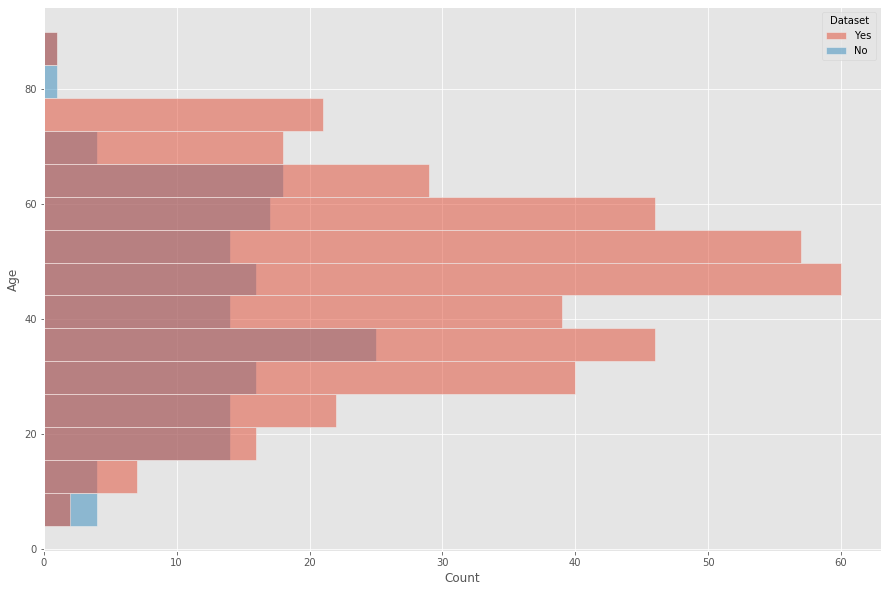

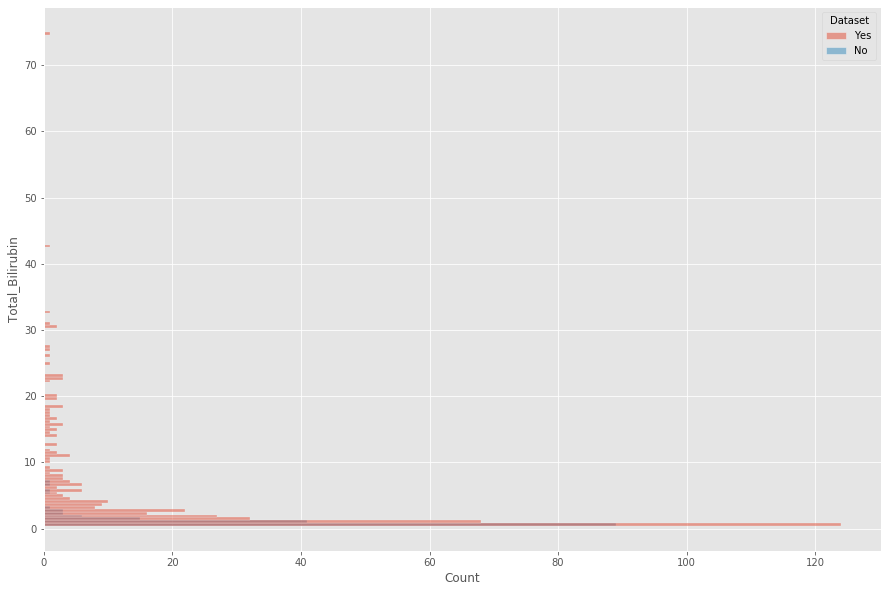

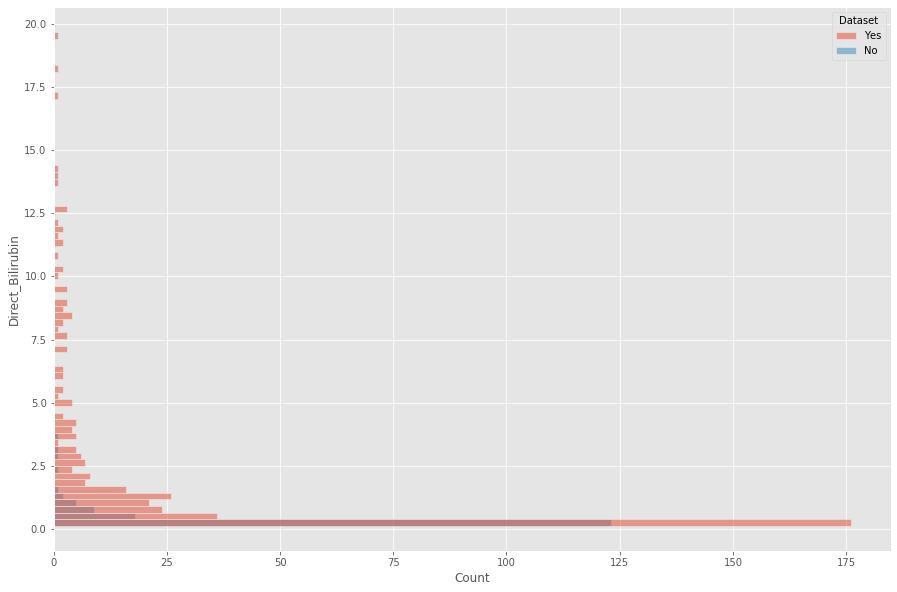

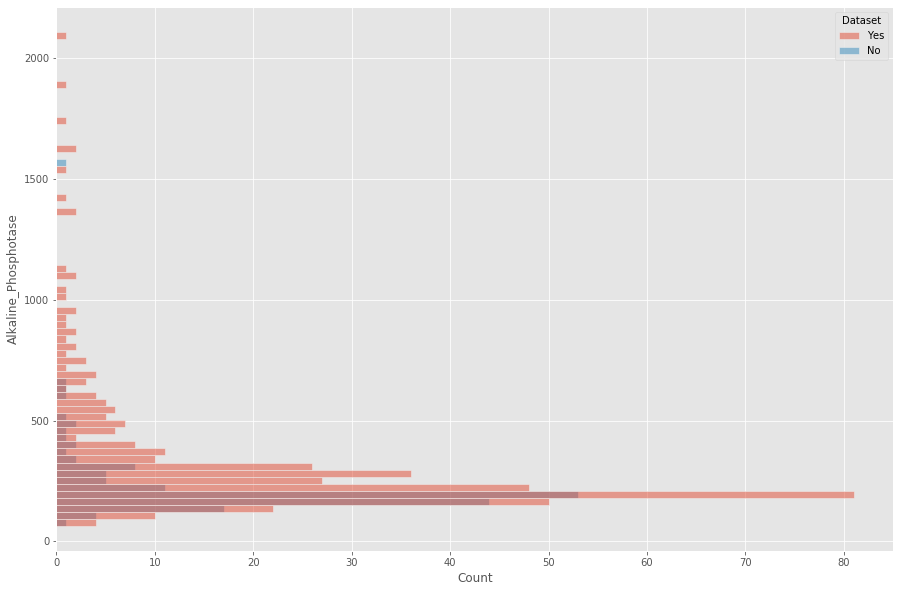

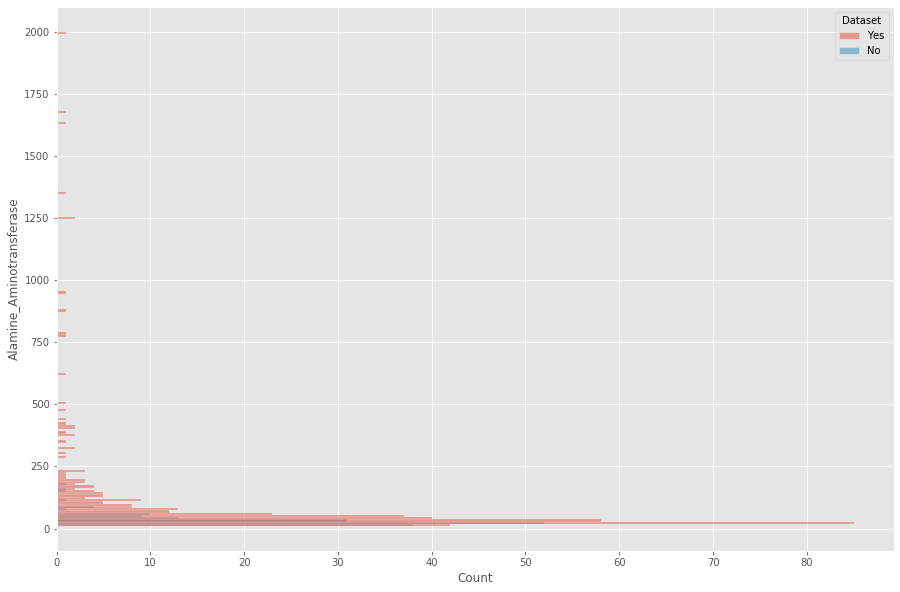

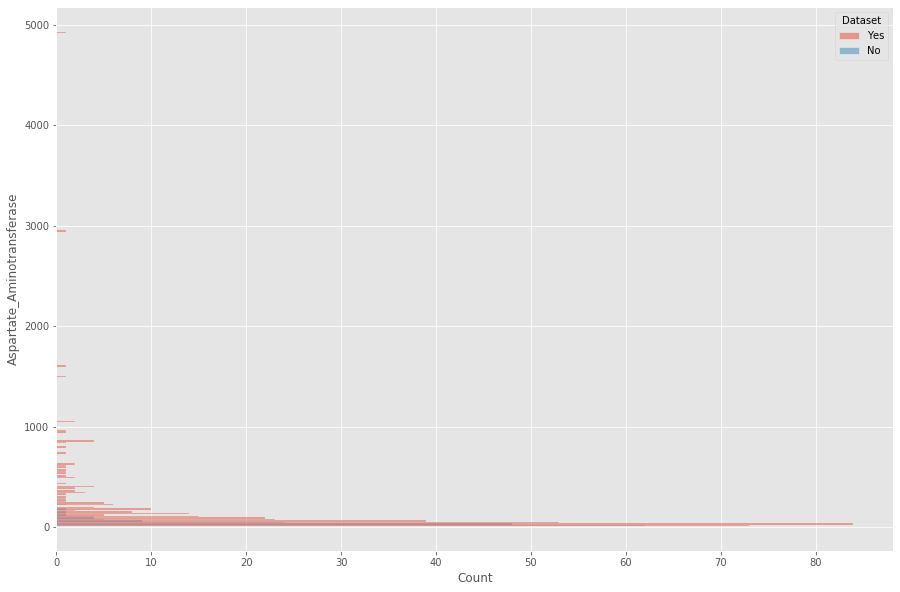

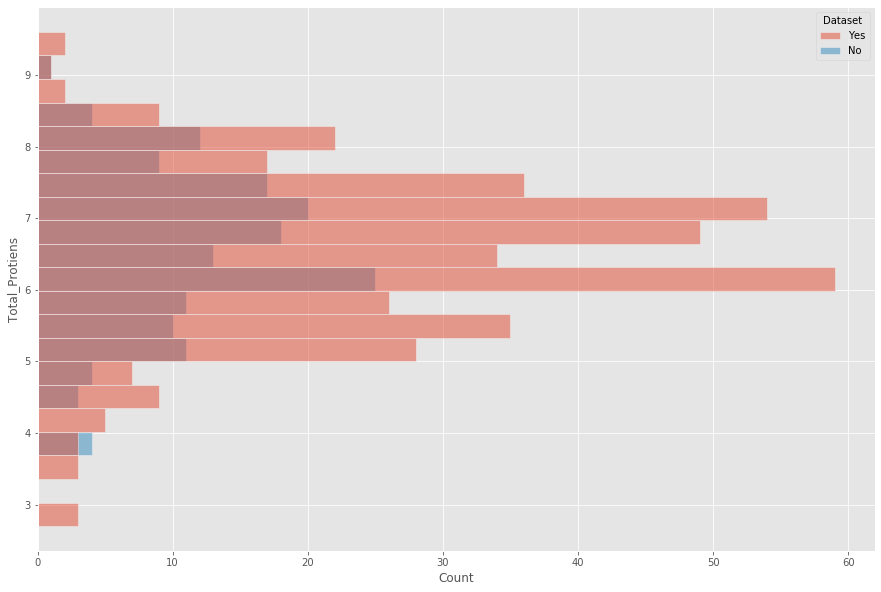

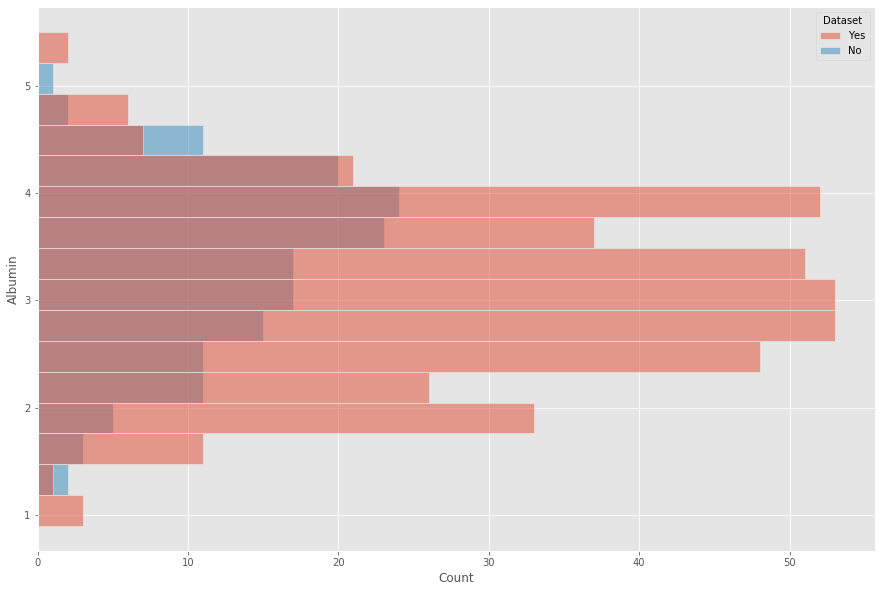

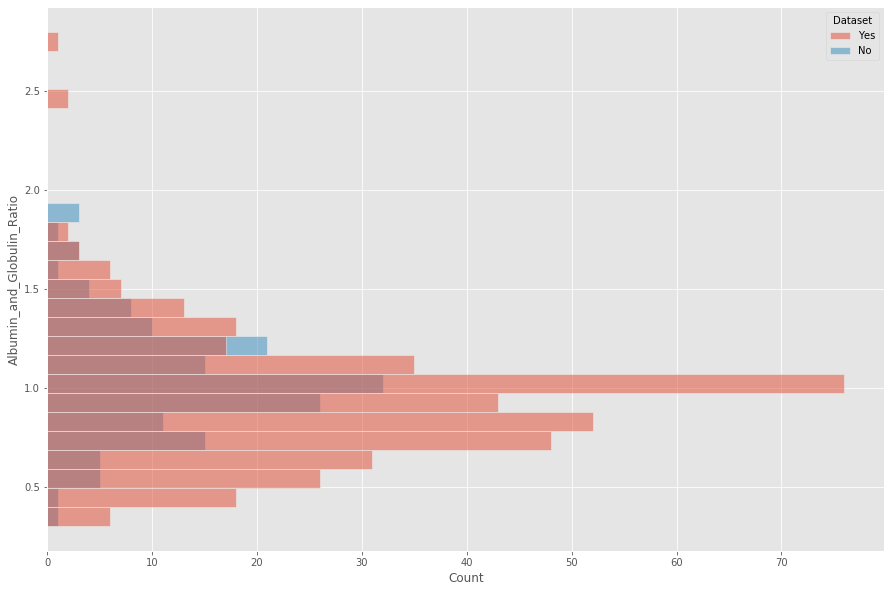

In [57]:
# Loop through the numerical variables and plot the histogram for each variable
for i in Features:
    plt.figure(figsize=(15, 10))
    sns.histplot(y = i, hue = 'Dataset', data = data)
    plt.show() 

From the histograms we can see that for each value of the Total_Protiens, Albumin and Albumin_and_Globulin_Ratio variables, the pattern of the values of the target variable is mostly similar. This indicates that the target variable is less dependent on these variables.

On the other hand as the value of the Age, Total_Bilirubin, Direct_Bilirubin , Alkaline_Phosphotase, Alamine_Aminotransferase,  and Aspartate_Aminotransferase variables change, the pattern of values of the target variable changes dramatically. This indicates that the target variable is more dependent on these variables

The independent variables on which the dependent variable has high dependency will play a significant role.

### Normalize the required columns using min max

In [58]:
# Loop through the list of column names to be normalized
# Derive the normalized value for each column by taking (val - min_of_val)/(max_of_val - min_of_val) 
# Store in a column named Normalized val (where val is the column name)
i=1

for i in Features:
    data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [59]:
# we use pd.get_dummies() method to one-hot encode the label ‘Disease’ ( with the integer ‘1’ representing presence of disease).
disease_initial = data['Dataset']
disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))

2 disease columns after one-hot encoding.


In [60]:
# Let's put the best features in array X and target in array y

# X = data.drop(['Outcome','Cancer_Markers','Insulin'],axis=1).values
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

We will train using the knn classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

In [61]:
# Split the dataset into the Training set and Test set in the ratio of 60:40. We use "stratify" so the proportion of labels is the same in splits
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4, stratify=Y,random_state = 5)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 339 samples.
Testing set has 227 samples.


### Create and train the machine learning model using Naïve Bayes Classifier

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [63]:
Y_train_preds = gnb.predict(X_train)
print(classification_report(Y_train_preds, Y_train))
print("Accuracy on training set: ", precision_score(Y_train_preds, Y_train, pos_label='Yes'))
Y_test_preds = gnb.predict(X_test)
print(classification_report(Y_test_preds, Y_test))
print("Accuracy on test set: ", precision_score(Y_test_preds, Y_test, pos_label='Yes'))

              precision    recall  f1-score   support

          No       0.93      0.43      0.58       211
         Yes       0.50      0.95      0.65       128

    accuracy                           0.62       339
   macro avg       0.71      0.69      0.62       339
weighted avg       0.77      0.62      0.61       339

Accuracy on training set:  0.5
              precision    recall  f1-score   support

          No       0.86      0.39      0.54       142
         Yes       0.47      0.89      0.62        85

    accuracy                           0.58       227
   macro avg       0.67      0.64      0.58       227
weighted avg       0.71      0.58      0.57       227

Accuracy on test set:  0.4691358024691358


### Create and train the machine learning model using Logistic regression Classifier

In [64]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [65]:
Y_train_preds = lr.predict(X_train)
print(classification_report(Y_train_preds, Y_train))
print("Accuracy on training set: ", precision_score(Y_train_preds, Y_train, pos_label='Yes'))
Y_test_preds = lr.predict(X_test)
print(classification_report(Y_test_preds, Y_test))
print("Accuracy on test set: ", precision_score(Y_test_preds, Y_test, pos_label='Yes'))

              precision    recall  f1-score   support

          No       0.01      1.00      0.02         1
         Yes       1.00      0.72      0.83       338

    accuracy                           0.72       339
   macro avg       0.51      0.86      0.43       339
weighted avg       1.00      0.72      0.83       339

Accuracy on training set:  1.0
              precision    recall  f1-score   support

          No       0.02      0.33      0.03         3
         Yes       0.99      0.71      0.83       224

    accuracy                           0.71       227
   macro avg       0.50      0.52      0.43       227
weighted avg       0.97      0.71      0.82       227

Accuracy on test set:  0.9876543209876543


The logistic regression classifier gives a higher accuracy than the naive bayes classifier.